# Experiment 2

In [19]:
import sys
sys.path.append(r"../lab_analysis")

import analysis_utils as au
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

In [20]:
# get experimental data
data = au.read_from_docs_splitting("exp2data.txt", 1, (0, 0), float)

# chop last trial because the ice didn't melt
for i, (values, errors) in enumerate(data):
    data[i] = values[:-1], errors[:-1]

# assign names to data
(mc, mc_err), (mh, mh_err), (mf, mf_err), (Tc, Tc_err), (Th, Th_err), (Tf, Tf_err) = data

# check that data is correct
au.print_datasets(["mc", "mh", "mf", "Tc", "Th", "Tf"], data)

# heat capacity of water
cw, cw_err = np.full(len(mc), 4.184), np.full(len(mc), 0.001)

# heat capacity of ice
ci, ci_err = np.full(len(mc), 2.093), np.full(len(mc), 0.001)

# create expression and symbols list
latent_heat_expr = "c_w * ( m_h * (T_f - T_h) - m_c * (T_f - T_c) ) / m_c"
syms = ["m_c", "m_h", "T_c", "T_h", "T_f", "c_w"]

latex_string = au.get_error_propagation_latex(latent_heat_expr, syms, False).replace(r"α", r"\alpha")
# get latex for error prop expression
print(f"Latex: {latex_string}")

# get latent heat values
L, L_err = au.calculate_derived_value(latent_heat_expr, syms, [], [], [mc, mh, Tc, Th, Tf, cw], [mc_err, mh_err, Tc_err, Th_err, Tf_err, cw_err], False)
au.print_dataset("Latent Heat", L, L_err)

mc Dataset:
	65.0 ± 1.0
	71.0 ± 1.0
	39.0 ± 1.0
		Mean: 58.333333333333336
		Std : 17.009801096230767
		Ste from values: 9.820613241770825
		Ste from errors: 0.5773502691896257
mh Dataset:
	156.0 ± 1.0
	175.0 ± 1.0
	303.0 ± 1.0
		Mean: 211.33333333333334
		Std : 79.95206897468842
		Ste from values: 46.16034854480389
		Ste from errors: 0.5773502691896257
mf Dataset:
	218.0 ± 1.0
	243.0 ± 1.0
	339.0 ± 1.0
		Mean: 266.6666666666667
		Std : 63.87748690527308
		Ste from values: 36.87968425991621
		Ste from errors: 0.5773502691896257
Tc Dataset:
	-1.3 ± 0.1
	-1.3 ± 0.1
	-1.0 ± 0.1
		Mean: -1.2
		Std : 0.17320508075688776
		Ste from values: 0.10000000000000002
		Ste from errors: 0.05773502691896259
Th Dataset:
	46.0 ± 0.1
	45.7 ± 0.1
	45.6 ± 0.1
		Mean: 45.76666666666667
		Std : 0.20816659994661224
		Ste from values: 0.12018504251546572
		Ste from errors: 0.05773502691896259
Tf Dataset:
	10.7 ± 0.1
	11.9 ± 0.1
	33.0 ± 0.1
		Mean: 18.533333333333335
		Std : 12.542859854647716
		Ste from values

# Experiment 3

Text(0, 0.5, 'Temperature ($^\\circ$C)')

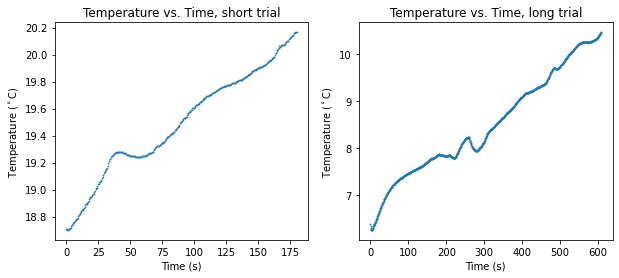

In [21]:
time_short, temperature_short = np.loadtxt('short_trial.csv', delimiter = ",", skiprows = 1, usecols=(0, 1), unpack = True)

time_long, temperature_long = np.loadtxt('long_trial.csv', delimiter = ",", skiprows = 1, usecols=(0, 1), unpack = True)

fig1, axes = plt.subplots(1, 2)
fig1.set_figwidth(10, 15)

axes[0].scatter(time_short, temperature_short, s = 0.5)
axes[0].set_title("Temperature vs. Time, short trial")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Temperature ($^\circ$C)")

axes[1].scatter(time_long, temperature_long, s = 0.5) 
axes[1].set_title("Temperature vs. Time, long trial")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Temperature ($^\circ$C)")

In [22]:
dT_dt_short = [(temperature_short[i+1] - temperature_short[i-1])/(time_short[i+1] - time_short[i-1]) for i in range(1, len(temperature_short)-1)]

dT_dt_short = [(temperature_short[1] - temperature_short[0])/(time_short[1]-time_short[0])] + dT_dt_short
dT_dt_short += [(temperature_short[-1] - temperature_short[-2])/(time_short[-1] - time_short[-2])]

dT_dt_short = np.array(dT_dt_short)

T_out = 46.7
l = 0.0027
cw = 4.184
mw = 121
r = 0.03
h = 0.05

H = mw * cw * dT_dt_short

K = [mw * cw * (dT_dt_short) * l/((2 * np.pi * r * h + np.pi * r**2) * (T_out - temperature_short))]


print(f"Heat flow: {np.mean(H)}")
print(f"Thermal Conductivity: {np.mean(K)}")


Heat flow: 4.082732937266717
Thermal Conductivity: 0.03301098249263259


In [24]:
dT_dt_long = [(temperature_long[i+1] - temperature_long[i-1])/(time_long[i+1] - time_long[i-1]) for i in range(1, len(temperature_long)-1)]

dT_dt_long = [(temperature_long[1] - temperature_long[0])/(time_long[1]-time_long[0])] + dT_dt_long
dT_dt_long += [(temperature_long[-1] - temperature_long[-2])/(time_long[-1] - time_long[-2])]

dT_dt_long = np.array(dT_dt_long)

T_out = 46.7
l = 0.0027
cw = 4.184
mw = 350
r = 0.03
h = 0.103

H = mw * cw * dT_dt_long

K = [mw * cw * (dT_dt_long) * l/((2 * np.pi * r * h + np.pi * r**2) * (T_out - temperature_long))]


print(f"Heat flow: {np.mean(H)}")
print(f"Thermal Conductivity: {np.mean(K)}")

Heat flow: 9.819585446467425
Thermal Conductivity: 0.03117795962434889


In [ ]:
K_model = "(m*c*d*l) / ((2*π*r*h + π * r ** 2) * (TO - TI))"
K_vars = ["m", "c", "d", "l", "r", "h", "TO", "TI"]

m_err = np.full(len(dT_dt_short), 1)
l_err = np.full(len(dT_dt_short), 0.01)
r_err = np.full(len(dT_dt_short), 0.01)
h_err = np.full(len(dT_dt_short), 0.01)
d_err = np.full(len(dT_dt_short), 0.01)
TO_err = np.full(len(dT_dt_short), 0.1)
TI_err = np.full(len(dT_dt_short), 0.1)

mw = np.full(len(dT_dt_short), mw)
cw = np.full(len(dT_dt_short), cw)
l = np.full(len(dT_dt_short), l)
r = np.full(len(dT_dt_short), r)
h = np.full(len(dT_dt_short), h)
T_out = np.full(len(dT_dt_short), T_out)

K, K_err = au.calculate_derived_value(K_model, K_vars, ["π", "c"], np.array([3.141, 4.184]), [mw, cw, dT_dt_short, l, r, h, T_out, temperature_short], [m_err, d_err, l_err, r_err, h_err, TO_err, TI_err], True)
au.print_dataset("Heat Conductivity ", K, K_err, 5) # 5 is the precision

au.get_error_propagation()

In [ ]:
time_can_short, temperature_can_short = np.loadtxt('short_can.csv', delimiter = ",", skiprows = 1, usecols=(0, 1), unpack = True)

time_can_long, temperature_can_long = np.loadtxt('long_can.csv', delimiter = ',', skiprows = 1, usecols = (0, 1), unpack= True)



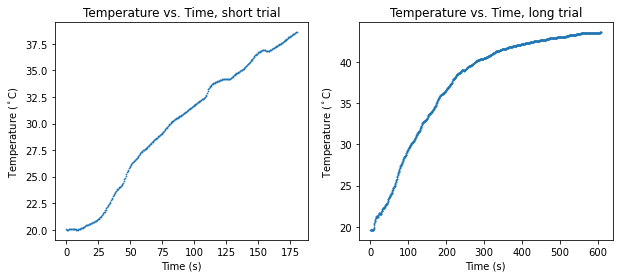

In [35]:
fig2, axes = plt.subplots(1, 2)
fig2.set_figwidth(10, 15)

axes[0].scatter(time_can_short, temperature_can_short, s = 0.5)
axes[0].set_title("Temperature vs. Time, short trial")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Temperature ($^\circ$C)")

axes[1].scatter(time_can_long, temperature_can_long, s = 0.5) 
axes[1].set_title("Temperature vs. Time, long trial")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Temperature ($^\circ$C)")

plt.show()

In [26]:
temp_difference_short = 46.7 - temperature_can_short
temp_difference_long = 46.7 - temperature_can_long

# dT/dt for long trial 
dT_dt_can_long = [(temperature_can_long[i+1] - temperature_can_long[i-1])/(time_can_long[i+1] - time_can_long[i-1]) for i in range(1, len(temperature_can_long)-1)]

dT_dt_can_long = [(temperature_can_long[1] - temperature_can_long[0])/(time_can_long[1]-time_can_long[0])] + dT_dt_can_long
dT_dt_can_long += [(temperature_can_long[-1] - temperature_can_long[-2])/(time_can_long[-1] - time_can_long[-2])]

dT_dt_can_long = np.array(dT_dt_can_long)


# dT/dt for short trial
dT_dt_can_short= [(temperature_can_short[i+1] - temperature_can_short[i-1])/(time_can_short[i+1] - time_can_short[i-1]) for i in range(1, len(temperature_can_short)-1)]

dT_dt_can_short = [(temperature_can_short[1] - temperature_can_short[0])/(temperature_can_short[1]-time_can_short[0])] + dT_dt_can_short
dT_dt_can_short += [(temperature_can_short[-1] - temperature_can_short[-2])/(time_can_short[-1] - time_can_short[-2])]

dT_dt_can_short = np.array(dT_dt_can_short)

H_short = mw * cw * dT_dt_can_short
H_long = mw * cw * dT_dt_can_long 

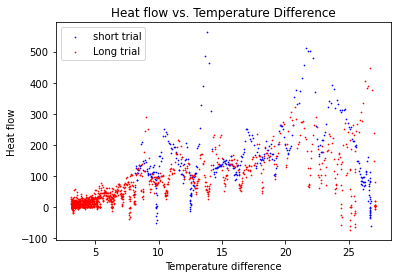

8.1008757357


In [36]:
plt.scatter(temp_difference_short, H_short, c = 'b', s = 0.5, label= 'short trial')
plt.scatter(temp_difference_long, H_long, c = 'r', s = 0.5, label ='Long trial')
plt.xlabel("Temperature difference")
plt.ylabel("Heat flow")
plt.title("Heat flow vs. Temperature Difference")
plt.legend()
plt.show()
print(min(temp_difference_short))